In [ ]:
from PIL import Image
import os
import torch
import random
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import torch.optim as optim
from time import time
from torchsummary import summary
from matplotlib import rcParams
from IPython.display import clear_output
from torch.autograd import Variable
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from IPython.display import clear_output
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from torch.utils.data import Dataset
from torchvision import datasets, models, transforms
import copy
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import tqdm
import seaborn as sns
import pandas as pd
from torch import randint

In [ ]:
! unzip -qq Data_gazobeton-marked_up.zip

replace Data_gazobeton/VAL/original/6.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
def binary_mask(label):
  red_color = (255, 0, 0)
  # dir = 'Data_gazobeton'
  dir = '/content/drive/MyDrive/augm'
  type_image = '/segment'
  content = os.listdir(dir + label + type_image)
  for name in content:
    image = Image.open(dir + label + type_image + '/' + name)
    image = image.convert('RGB')
    w, h = image.size
    new_image = Image.new('RGB', (w, h), color = 2)
    for x in range(w):
        for y in range(h):
              pixel_color = image.getpixel((x, y))
              if abs(pixel_color[0] - red_color[0]) < 50 and abs(pixel_color[1]) < 50 and abs(pixel_color[2]) < 50:
                new_image.putpixel((x, y), (255, 0, 0))
              else:
                new_image.putpixel((x, y), (0, 255, 0))
    new_image.save(dir + label + type_image + '/' + name)

In [ ]:
def resize_(label):
  dir = '/content/drive/MyDrive/augm'
  type_image = '/segment'
  content = os.listdir(dir + label + type_image)
  for name in content:
    image = Image.open(dir + label + type_image + '/' + name)
    image = image.convert('RGB')
    w, h = image.size
    resized_image = image.resize((256, 256))
    resized_image.save("/content/drive/MyDrive/augm_256" + label + type_image + '/' + name)
    image.close()

In [ ]:
binary_mask('/TRAIN')

In [ ]:
binary_mask('/TEST')

In [ ]:
binary_mask('/VAL')

In [ ]:
resize_('/TRAIN')
# resize_('/TEST')
# resize_('/VAL')

In [ ]:
def preprocessing(label, level_of_cracks):
    green_color = (0, 255, 0)
    red_color = (255, 0, 0)
    dir = '/content/drive/MyDrive/UnprocessedEqSz_cut'
    dir_new = '/content/drive/MyDrive/preprosessing_no_augm'
    type_image = '/segment'
    content = os.listdir(dir + label + type_image)
    drop_image = 0
    save_image = 0
    for name in content:
        image_seg = Image.open(dir + label + '/segment' + '/' + name)
        image_seg = image_seg.convert('RGB')
        w, h = image_seg.size
        red_counter = 0
        green_counter = 0
        for x in range(w):
            for y in range(h):
                  pixel_color = image_seg.getpixel((x, y))
                  if abs(pixel_color[0] - red_color[0]) < 10 and abs(pixel_color[1])  < 10 and abs(pixel_color[2]) < 10:
                    red_counter += 1
                  else:
                    green_counter += 1
        if red_counter / (green_counter + red_counter) >= level_of_cracks:
          image_seg.save(dir_new + label + '/segment' + '/' + name)
          image_org = Image.open(dir + label + '/original' + '/' + name[:-4] + '.jpg')
          image_org.save(dir_new + label + '/original' + '/' + name[:-4] + '.jpg')
          if red_counter / (green_counter + red_counter) == level_of_cracks:
            print(name)

In [ ]:
def dist_pixel(label):
    red_color = (255, 0, 0)
    dir = '/content/drive/MyDrive/UnprocessedEqSz_cut'
    type_image = '/segment'
    content = os.listdir(dir + label + type_image)
    percent_counter = []

    for name in content:
        image_seg = Image.open(dir + label + '/segment' + '/' + name)
        image_seg = image_seg.convert('RGB')
        w, h = image_seg.size
        red_counter = 0
        green_counter = 0
        for x in range(w):
            for y in range(h):
                  pixel_color = image_seg.getpixel((x, y))
                  if abs(pixel_color[0] - red_color[0]) < 10 and abs(pixel_color[1])  < 10 and abs(pixel_color[2]) < 10:
                    red_counter += 1
                  else:
                    green_counter += 1
        percent_counter.append(red_counter / (green_counter + red_counter))
    return percent_counter

In [ ]:
def max_pixel(label):
    red_color = (255, 0, 0)
    dir = '/content/drive/MyDrive/augm_crop'
    type_image = '/segment'
    content = os.listdir(dir + label + type_image)
    max = 0
    id = 0
    for name in content:
        image_seg = Image.open(dir + label + '/segment' + '/' + name)
        image_seg = image_seg.convert('RGB')
        w, h = image_seg.size
        red_counter = 0
        green_counter = 0
        for x in range(w):
            for y in range(h):
                  pixel_color = image_seg.getpixel((x, y))
                  if abs(pixel_color[0] - red_color[0]) < 10 and abs(pixel_color[1])  < 10 and abs(pixel_color[2]) < 10:
                    red_counter += 1
                  else:
                    green_counter += 1
        if red_counter / (green_counter + red_counter) > max:
          id = name
          max = red_counter / (green_counter + red_counter)
    return id, max

In [ ]:
binary_mask('/TRAIN')
binary_mask('/TEST')
binary_mask('/VAL')

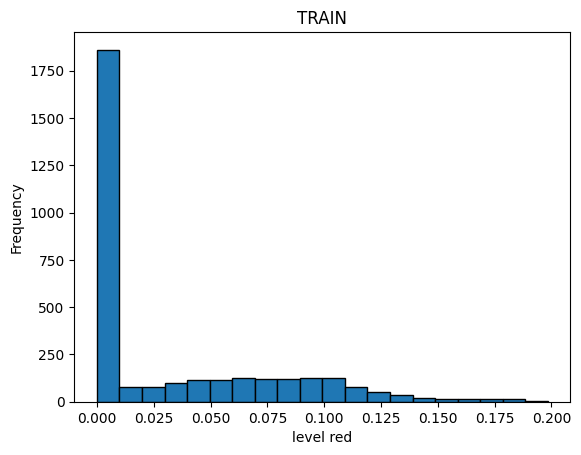

In [ ]:
percent_counter_train = dist_pixel('/TRAIN')
plt.hist(percent_counter_train, bins=20, edgecolor='k')
plt.xlabel('level red')
plt.ylabel('Frequency')
plt.title('TRAIN')
plt.show()

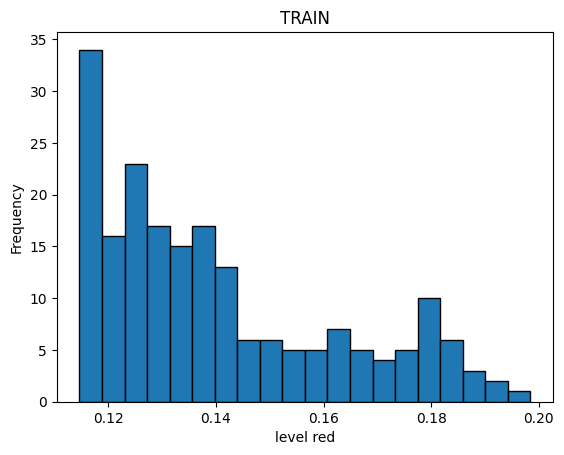

In [ ]:
plt.hist(sorted(percent_counter_train)[-200:], bins=20, edgecolor='k')
plt.xlabel('level red')
plt.ylabel('Frequency')
plt.title('TRAIN')
plt.show()

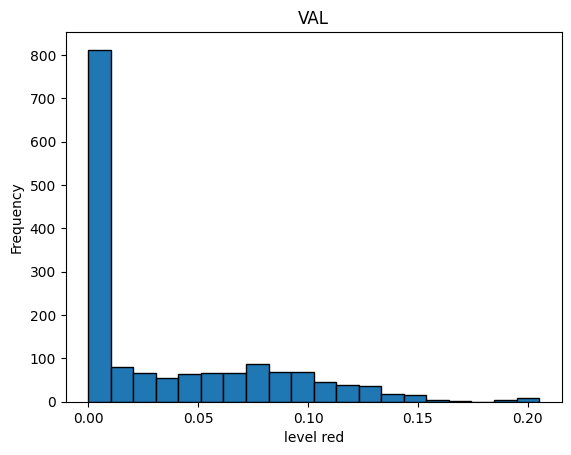

In [ ]:
percent_counter_val = dist_pixel('/VAL')
plt.hist(percent_counter_val, bins=20, edgecolor='k')
plt.xlabel('level red')
plt.ylabel('Frequency')
plt.title('VAL')
plt.show()

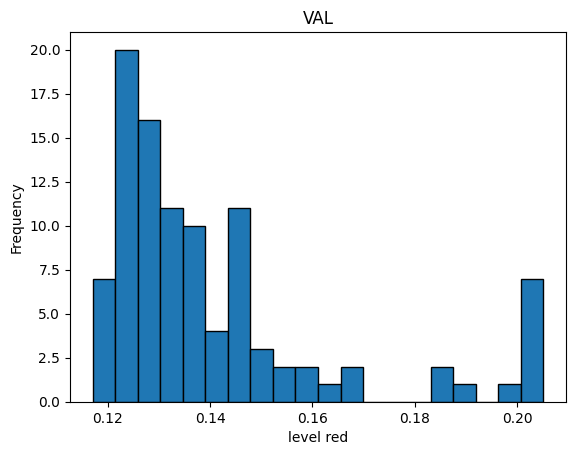

In [ ]:
plt.hist(sorted(percent_counter_val)[-100:], bins=20, edgecolor='k')
plt.xlabel('level red')
plt.ylabel('Frequency')
plt.title('VAL')
plt.show()

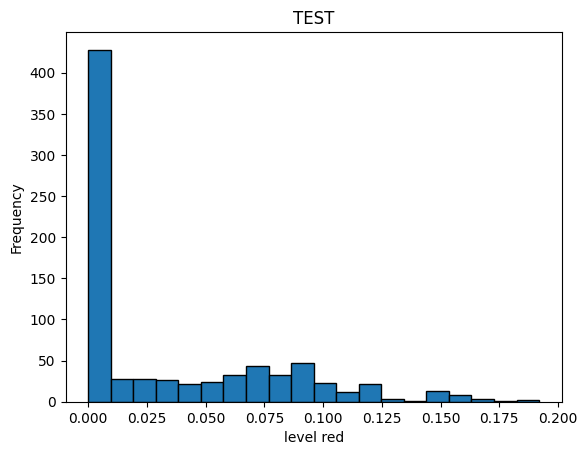

In [ ]:
percent_counter_test = dist_pixel('/TEST')
plt.hist(percent_counter_test, bins=20, edgecolor='k')
plt.xlabel('level red')
plt.ylabel('Frequency')
plt.title('TEST')
plt.show()

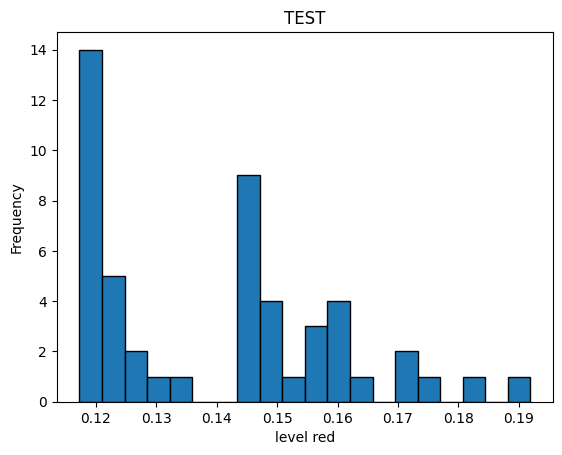

In [ ]:
plt.hist(sorted(percent_counter_test)[-50:], bins=20, edgecolor='k')
plt.xlabel('level red')
plt.ylabel('Frequency')
plt.title('TEST')
plt.show()

In [ ]:
pred_val_befor = pd.DataFrame()
pred_val_befor['level_red'] = percent_counter_val
pred_val_befor.to_excel('val_before.xlsx')

In [ ]:
pred_val_after = pd.DataFrame()
pred_val_after['level_red'] = sorted(percent_counter_val)[-100:]
pred_val_after.to_excel('val_after.xlsx')

In [ ]:
pred_test_befor = pd.DataFrame()
pred_test_befor['level_red'] = percent_counter_test
pred_test_befor.to_excel('test_before.xlsx')

In [ ]:
pred_test_after = pd.DataFrame()
pred_test_after['level_red'] = sorted(percent_counter_test)[-50:]
pred_test_after.to_excel('test_after.xlsx')

In [ ]:
data = pd.read_excel('train_after.xlsx')

In [ ]:
data['level_red'].min()

0.11464375

In [ ]:
preprocessing('/TEST', sorted(percent_counter_test)[-50:][0])

image_1_2_42.png


In [ ]:
preprocessing('/VAL', sorted(percent_counter_val)[-100:][0])

image_2_2_55.png
image_2_2_23.png


In [ ]:
preprocessing('/TRAIN', 0.11464375)

image_1_2_133.png


In [ ]:
val = dist_pixel('/VAL')
test = dist_pixel('/TEST')
train = dist_pixel('/TRAIN')

In [ ]:
preprocessing('/TEST', sorted(test)[-15:][0])
preprocessing('/VAL', sorted(val)[-15:][0])
preprocessing('/TRAIN', sorted(train)[-30:][0])

image_1_0_14.png
image_1_1_2.png
image_0_2_4.png


In [ ]:
original_tr = []
segmentation_tr = []

original_test = []
segmentation_test = []

original_val = []
segmentation_val = []

for name in os.listdir('/content/drive/MyDrive/preprocessing_150/TRAIN/original'):
        original_tr.append(imread('/content/drive/MyDrive/preprocessing/TRAIN/original' + '/' + name))
        segmentation_tr.append(imread('/content/drive/MyDrive/preprocessing/TRAIN/segment' + '/' + name))
for name in os.listdir('/content/drive/MyDrive/preprocessing/TEST/original'):
        original_test.append(imread('/content/drive/MyDrive/preprocessing/TEST/original' + '/' + name))
        segmentation_test.append(imread('/content/drive/MyDrive/preprocessing/TEST/segment' + '/' + name))
for name in os.listdir('/content/drive/MyDrive/preprocessing/VAL/original'):
        original_val.append(imread('/content/drive/MyDrive/preprocessing/VAL/original' + '/' + name))
        segmentation_val.append(imread('/content/drive/MyDrive/preprocessing/VAL/segment' + '/' + name))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_train =  [resize(x, (256, 256), mode='constant', anti_aliasing=True,) for x in original_tr]
y_train = [resize(x, (256, 256), mode='constant', anti_aliasing=True,) > 0.5 for x in segmentation_tr]

X_test = [resize(x, (256, 256), mode='constant', anti_aliasing=True,) for x in original_test]
y_test = [resize(x, (256, 256), mode='constant', anti_aliasing=True,) > 0.5 for x in segmentation_test]

X_val = [resize(x, (256, 256), mode='constant', anti_aliasing=True,) for x in original_val]
y_val = [resize(x, (256, 256), mode='constant', anti_aliasing=True,) > 0.5 for x in segmentation_val]

X_train, y_train, X_test, y_test, X_val, y_val = \
np.array(X_train, dtype = np.float32), np.array(y_train, dtype = np.float32), np.array(X_test, dtype = np.float32), np.array(y_test, dtype = np.float32), np.array(X_val, dtype = np.float32), np.array(y_val, dtype = np.float32)

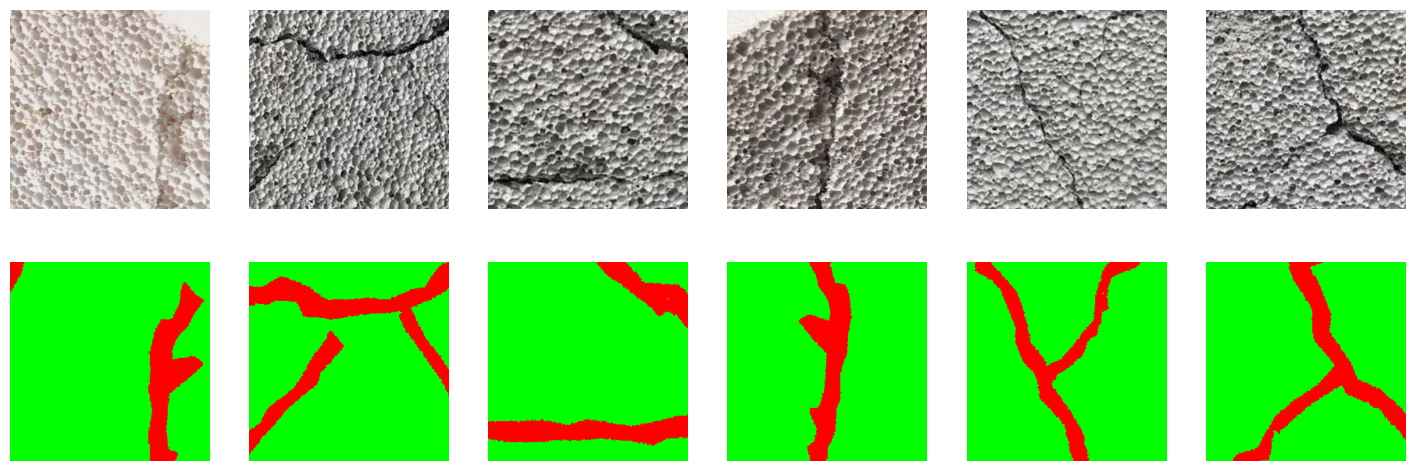

In [ ]:
plt.figure(figsize=(18, 6))
for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.axis("off")
    plt.imshow(X_train[i])

    plt.subplot(2, 6, i+7)
    plt.axis("off")
    plt.imshow(y_train[i])
plt.show();

In [ ]:
data_tr = DataLoader(list(zip(np.rollaxis(X_train, 3, 1), np.rollaxis(y_train, 3, 1))),
                     shuffle=True,
                     num_workers=2, batch_size= 20)
data_val = DataLoader(list(zip(np.rollaxis(X_val, 3, 1), np.rollaxis(y_val, 3, 1))), shuffle=False,
                      num_workers=2)
data_ts = DataLoader(list(zip(np.rollaxis(X_test, 3, 1), np.rollaxis(y_test, 3, 1))), shuffle=False,
                     num_workers=2)

In [ ]:
class SegNet(nn.Module):
    def __init__(self):
        super().__init__()

        batchNorm_momentum = 0.1


        self.enc_conv0 = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64, momentum= batchNorm_momentum),
            nn.ReLU()
        )
        self.pool0 = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)

        self.enc_conv1 = nn.Sequential(
            nn.Conv2d(in_channels = 64, out_channels = 64*2, kernel_size=3, padding=1),
            nn.BatchNorm2d(64*2, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels = 64*2, out_channels = 64*2, kernel_size=3, padding=1),
            nn.BatchNorm2d(64*2, momentum= batchNorm_momentum),
            nn.ReLU()
        )
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)

        self.enc_conv2 = nn.Sequential(
            nn.Conv2d(in_channels = 64*2, out_channels = 64*4, kernel_size=3, padding=1),
            nn.BatchNorm2d(64*4, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels = 64*4, out_channels = 64*4, kernel_size=3, padding=1),
            nn.BatchNorm2d(64*4, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels = 64*4, out_channels = 64*4, kernel_size=3, padding=1),
            nn.BatchNorm2d(64*4, momentum= batchNorm_momentum),
            nn.ReLU()
        )
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)
        self.enc_conv3 = nn.Sequential(
            nn.Conv2d(in_channels = 64*4, out_channels = 64*8, kernel_size=3, padding=1),
            nn.BatchNorm2d(64*8, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels = 64*8, out_channels = 64*8, kernel_size=3, padding=1),
            nn.BatchNorm2d(64*8, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels = 64*8, out_channels = 64*8, kernel_size=3, padding=1),
            nn.BatchNorm2d(64*8, momentum= batchNorm_momentum),
            nn.ReLU()
        )
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)

        self.bottleneck_conv = nn.Sequential(
            nn.Conv2d(in_channels = 64*8, out_channels = 64*8, kernel_size=3, padding=1),
            nn.BatchNorm2d(64*8, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels = 64*8, out_channels = 64*8, kernel_size=3, padding=1),
            nn.BatchNorm2d(64*8, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels = 64*8, out_channels = 64*8, kernel_size=3, padding=1),
            nn.BatchNorm2d(64*8, momentum= batchNorm_momentum),
            nn.ReLU()
        )

        self.bottleneck_pool = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)
        self.bottleneck_upsample = nn.MaxUnpool2d(kernel_size=2, stride=2)

        self.bottleneck_dec = nn.Sequential(
            nn.Conv2d(in_channels=64*8, out_channels=64*8, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(64*8),
            nn.ReLU(),
            nn.Conv2d(in_channels=64*8, out_channels=64*8, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(64*8),
            nn.ReLU(),
            nn.Conv2d(in_channels=64*8, out_channels=64*8, kernel_size=3, padding = (1,1)),
            nn.BatchNorm2d(64*8),
            nn.ReLU()
        )

        self.upsample0 = nn.MaxUnpool2d(kernel_size=2, stride=2)
        self.dec_conv0 = nn.Sequential(
            nn.Conv2d(in_channels = 64*8, out_channels = 64*8, kernel_size=3, padding=1),
            nn.BatchNorm2d(64*8, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels = 64*8, out_channels = 64*8, kernel_size=3, padding=1),
            nn.BatchNorm2d(64*8, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels = 64*8, out_channels = 64*4, kernel_size=3, padding=1),
            nn.BatchNorm2d(64*4, momentum= batchNorm_momentum),
            nn.ReLU()
        )

        self.upsample1 = nn.MaxUnpool2d(kernel_size=2, stride=2) # 32 -> 64
        self.dec_conv1 = nn.Sequential(
            nn.Conv2d(in_channels = 64*4, out_channels = 64*4, kernel_size=3, padding=1),
            nn.BatchNorm2d(64*4, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels = 64*4, out_channels = 64*4, kernel_size=3, padding=1),
            nn.BatchNorm2d(64*4, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels = 64*4, out_channels = 64*2, kernel_size=3, padding=1),
            nn.BatchNorm2d(64*2, momentum= batchNorm_momentum),
            nn.ReLU()
        )

        self.upsample2 = nn.MaxUnpool2d(kernel_size=2, stride=2) # 64 -> 128
        self.dec_conv2 = nn.Sequential(
            nn.Conv2d(in_channels = 64*2, out_channels = 64*2, kernel_size=3, padding=1),
            nn.BatchNorm2d(64*2, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels = 64*2, out_channels = 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64, momentum= batchNorm_momentum),
            nn.ReLU()
        )

        self.upsample3 = nn.MaxUnpool2d(kernel_size=2, stride=2)# 128 -> 256
        self.dec_conv3 = nn.Sequential(
            nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64, momentum= batchNorm_momentum),
            nn.ReLU(),
            nn.Conv2d(in_channels = 64, out_channels = 3, kernel_size=3, padding=1)
        )

    def forward(self, x):
        # encoder
        e0 = self.enc_conv0(x)
        e0, ind0 = self.pool0(e0)
        e1 = self.enc_conv1(e0)
        e1, ind1 = self.pool1(e1)
        e2 = self.enc_conv2(e1)
        e2, ind2 = self.pool2(e2)
        e3 = self.enc_conv3(e2)
        e3, ind3 = self.pool3(e3)

        # bottleneck
        b = self.bottleneck_conv(e3)
        b, ind_b = self.bottleneck_pool(b)
        b = self.bottleneck_upsample(b, ind_b)
        b = self.bottleneck_dec(b)

        # decoder
        d0 = self.upsample0(b, ind3)
        d0 = self.dec_conv0(d0)
        d1 = self.upsample1(d0, ind2)
        d1 = self.dec_conv1(d1)
        d2 = self.upsample2(d1, ind1)
        d2 = self.dec_conv2(d2)
        d3 = self.upsample3(d2, ind0)
        d3 = self.dec_conv3(d3)

        return d3

In [ ]:
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

CUDA is available!  Training on GPU ...
cuda


In [ ]:
def iou_pytorch(outputs: torch.Tensor, labels: torch.Tensor):
    outputs = outputs.squeeze(1).byte()
    labels = labels.squeeze(1).byte()
    SMOOTH = 1e-8
    intersection = (outputs & labels).float().sum((1, 2))
    union = (outputs | labels).float().sum((1, 2))

    iou = (intersection + SMOOTH) / (union + SMOOTH)

    return iou

def dice_coeff(pred, target):
    smooth = 1.
    num = pred.size(0)
    m1 = pred.view(num, -1).float()  # Flatten
    m2 = target.view(num, -1).float()  # Flatten
    intersection = (m1 * m2).sum().float()

    return (2. * intersection + smooth) / (m1.sum() + m2.sum() + smooth)

ALPHA = 0.8
GAMMA = 2

class FocalLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(FocalLoss, self).__init__()

    def forward(self, inputs, targets, alpha=ALPHA, gamma=GAMMA, smooth=1):

        #comment out if your model contains a sigmoid or equivalent activation layer
        inputs = F.sigmoid(inputs)

        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)

        #first compute binary cross-entropy
        BCE = F.binary_cross_entropy(inputs, targets, reduction='mean')
        BCE_EXP = torch.exp(-BCE)
        focal_loss = alpha * (1-BCE_EXP)**gamma * BCE

        return focal_loss


In [ ]:
def train(model, optimizer, loss_fn, epochs, data_tr, data_val, used_sheduler=True):

    epoch_loss_f1 = []
    epoch_loss_iou = []
    epoch_loss_pr = []
    epoch_loss_re = []
    epoch_loss_val = []
    epoch_loss_dice = []

    f1 = 0
    pre = 0
    re = 0
    iou = 0
    avg_loss_train = 0
    avf_loss_val = 0

    epoch_loss_f1_train = []
    epoch_loss_iou_train = []
    epoch_loss_pr_train = []
    epoch_loss_re_train = []
    epoch_loss_train = []
    epoch_loss_dice_train = []

    X_val, Y_val = next(iter(data_val))

    X, Y = next(iter(data_tr))

    if used_sheduler:
        scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[epochs//3,epochs//2,epochs//1.4,epochs//1.1], gamma=0.8)
        #scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=0.95)
    for epoch in range(epochs):
        tic = time()
        print('* Epoch %d/%d' % (epoch+1, epochs))

        avg_loss  = 0
        avg_score = 0
        avg_loss_val = 0
        model.train()  # train mode
        for X_batch, Y_batch in data_tr:
            X_batch = X_batch.to(device)  # data to device
            Y_batch = Y_batch.to(device)  # data to device

            # set parameter gradients to zero
            optimizer.zero_grad()

            # forward
            Y_pred = model(X_batch)
            loss =  loss_fn(Y_pred, Y_batch) # forward-pass
            loss.backward()  # backward-pass
            optimizer.step()  # update weights
            avg_loss += loss / len(data_tr)
            predict = torch.sigmoid(Y_pred).flatten() > 0.5
            true = Y_batch.detach().cpu().numpy().flatten() > 0.5


        print('avg loss train = ', loss)

        Y_batch, X_batch = Y_batch.to('cpu'), X_batch.to('cpu')

        model.eval()  # testing mode
        Y_val, X_val = Y_val.to(device), X_val.to(device)
        y_pred = model(X_val)
        loss_ =  loss_fn(torch.sigmoid(y_pred), Y_val)

        predict = torch.sigmoid(y_pred).flatten() > 0.5
        true = Y_val.detach().cpu().numpy().flatten() > 0.5

        f1 = f1_score(predict.detach().cpu().numpy(), true)
        re = recall_score(predict.detach().cpu().numpy(), true)
        pre = precision_score(predict.detach().cpu().numpy(), true)
        iou = iou_pytorch(torch.sigmoid(y_pred) > 0.5, Y_val).mean().item()
        dice = dice_coeff(torch.sigmoid(y_pred) > 0.5, Y_val > 0.5).detach().cpu().numpy()

        epoch_loss_f1.append(f1)
        epoch_loss_iou.append(iou)
        epoch_loss_pr.append(pre)
        epoch_loss_re.append(re)
        epoch_loss_val.append(loss_.detach().cpu().numpy())
        epoch_loss_dice.append(dice)


        Y, X = Y.to(device), X.to(device)
        y_pred_train = model(X)
        loss_ =  loss_fn(torch.sigmoid(y_pred_train), Y)

        predict = torch.sigmoid(y_pred_train).flatten() > 0.5
        true = Y.detach().cpu().numpy().flatten() > 0.5

        f1 = f1_score(predict.detach().cpu().numpy(), true)
        re = recall_score(predict.detach().cpu().numpy(), true)
        pre = precision_score(predict.detach().cpu().numpy(), true)
        iou = iou_pytorch(torch.sigmoid(y_pred_train) > 0.5, Y).mean().item()
        dice = dice_coeff(torch.sigmoid(y_pred_train) > 0.5, Y > 0.5).detach().cpu().numpy()

        epoch_loss_f1_train.append(f1)
        epoch_loss_iou_train.append(re)
        epoch_loss_pr_train.append(pre)
        epoch_loss_re_train.append(re)
        epoch_loss_train.append(loss_.detach().cpu().numpy())
        epoch_loss_dice_train.append(dice)

        Y, X = Y.to('cpu'), X.to('cpu')

        Y_val, X_val = Y_val.to('cpu'), X_val.to('cpu')


        toc = time()

        if used_sheduler:
          scheduler.step()
    return epoch_loss_dice_train,epoch_loss_dice, epoch_loss_f1, epoch_loss_iou, epoch_loss_pr, epoch_loss_re, epoch_loss_val, epoch_loss_f1_train, epoch_loss_iou_train, epoch_loss_pr_train, epoch_loss_re_train, epoch_loss_train

In [ ]:
# foc_loss = FocalLoss()
bce_loss = nn.BCEWithLogitsLoss()

In [ ]:
model = SegNet().to(device)

In [ ]:
BASE_LR = 3e-4
AMSGRAD = False

In [ ]:
optim = torch.optim.AdamW(model.parameters(), lr = BASE_LR, betas=(0.9, 0.999), eps=1e-8, amsgrad=AMSGRAD)

In [ ]:
max_epochs = 100
epoch_loss_dice_train,epoch_loss_dice, epoch_loss_f1, epoch_loss_iou, epoch_loss_pr, epoch_loss_re, epoch_loss_val, epoch_loss_f1_train, epoch_loss_iou_train, epoch_loss_pr_train, epoch_loss_re_train, epoch_loss_train = train(model, optim, bce_loss, max_epochs, data_tr, data_val)

* Epoch 1/100
avg loss train =  tensor(0.6270, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
* Epoch 2/100
avg loss train =  tensor(0.4461, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
* Epoch 3/100
avg loss train =  tensor(0.3283, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
* Epoch 4/100
avg loss train =  tensor(0.2839, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
* Epoch 5/100
avg loss train =  tensor(0.2675, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
* Epoch 6/100
avg loss train =  tensor(0.2507, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
* Epoch 7/100
avg loss train =  tensor(0.2407, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
* Epoch 8/100
avg loss train =  tensor(0.2508, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
* Epoch 9/100
avg loss train =  tensor(0

In [ ]:
def score_model(model, metric, data):
    model.eval()
    scores = 0
    for X_batch, Y_label in data:
        Y_pred = torch.sigmoid(model(X_batch.to(device))) > 0.5
        scores += metric(Y_pred, Y_label.to(device)).mean().item()
    return scores/len(data)

def scores(model):
    val_score = score_model(model, iou_pytorch, data_val)
    test_score = score_model(model, iou_pytorch, data_ts)
    print(f"\nScore на валидации: {val_score:.4f}, score на тесте: {test_score:.4f}")
    return val_score, test_score

In [ ]:
def predict(model, data):
    model.eval()
    Y_preds = []
    Y_labels = []
    X_orig= []
    for X_batch, Y_label in data:
         Y_preds.append(model(X_batch.to(device)).detach().cpu().numpy())
         Y_labels.append(Y_label)
         X_orig.append(X_batch)
    return Y_preds, Y_labels, X_orig

In [ ]:
data_tr = DataLoader(list(zip(np.rollaxis(X_train, 3, 1), np.rollaxis(y_train, 3, 1))),
                     shuffle=True,
                     num_workers=2, batch_size= 1)


VAL data


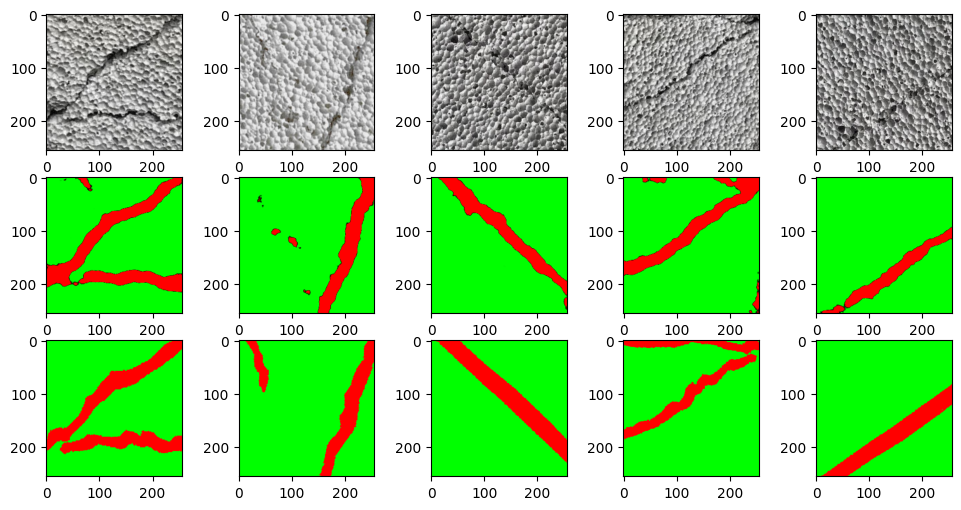

In [ ]:
print('VAL data')
pred, label, original = predict(model, data_val)
f, ax = plt.subplots(3, 5, figsize=(12,6), squeeze=False)
for i, (pr, la, ori) in enumerate(zip(pred[10:15], label[10:15], original[10:20])):
  pred_np = np.array(pr[0])
  label_np = np.array(la[0])
  orig_np = np.array(ori[0])
  ax[0][i].imshow(np.rollaxis(orig_np, 0, 3))
  ax[1][i].imshow(np.rollaxis(pred_np, 0, 3))
  ax[2][i].imshow(np.rollaxis(label_np, 0, 3))
plt.show()

TEST data


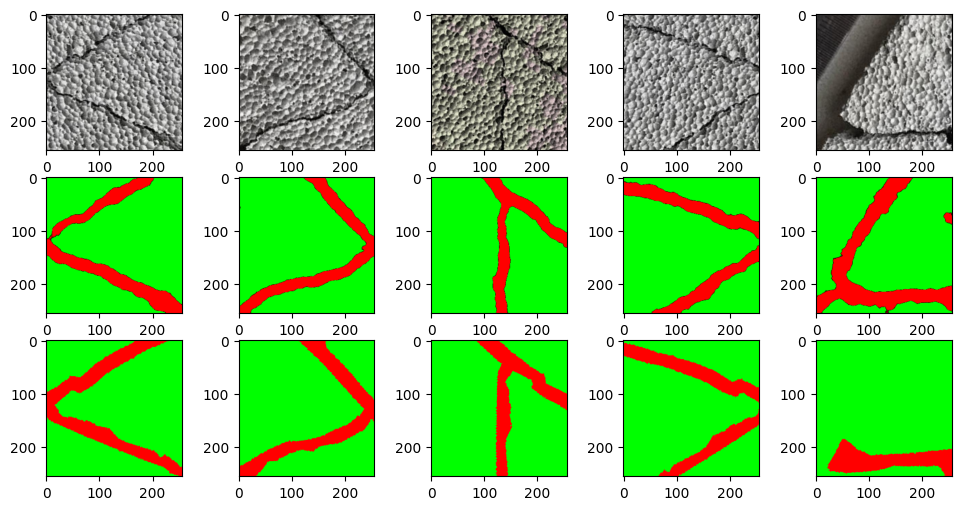

In [ ]:
print('TEST data')
pred, label, original = predict(model, data_ts)
f, ax = plt.subplots(3, 5, figsize=(12,6), squeeze=False)
for i, (pr, la, ori) in enumerate(zip(pred[10:15], label[10:15], original[10:20])):
  pred_np = np.array(pr[0])
  label_np = np.array(la[0])
  orig_np = np.array(ori[0])
  ax[0][i].imshow(np.rollaxis(orig_np, 0, 3))
  ax[1][i].imshow(np.rollaxis(pred_np, 0, 3))
  ax[2][i].imshow(np.rollaxis(label_np, 0, 3))
plt.show()

In [ ]:
X_val, Y_val = next(iter(data_val))
model.eval()  # testing mode
Y_val, X_val = Y_val.to(device), X_val.to(device)
y_pred = model(X_val)
loss_ =  bce_loss(X_val, y_pred) / len(data_val)

predict = torch.sigmoid(y_pred).flatten() > 0.5
true = Y_val.detach().cpu().numpy().flatten() > 0.5

f1 = f1_score(predict.detach().cpu().numpy(), true)
re = recall_score(predict.detach().cpu().numpy(), true)
pre = precision_score(predict.detach().cpu().numpy(), true)
iou = iou_pytorch(torch.sigmoid(y_pred) > 0.5, Y_val).mean().item()
dice = dice_coeff(torch.sigmoid(y_pred) > 0.5, Y_val > 0.5).detach().cpu().numpy()

In [ ]:
dice

Dice()

In [ ]:
print(f1, re, pre, iou)

0.9512869050163344 0.9512288200274768 0.9513449970993252 0.9083784222602844


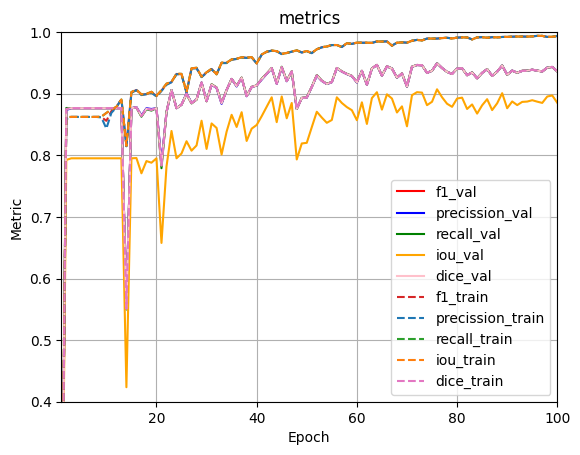

In [ ]:
epoch = [x for x in range(1, max_epochs + 1)]
plt.grid(True)
plt.ylabel("Metric")
plt.xlabel('Epoch')
plt.xlim(1, max_epochs)
plt.plot(epoch, epoch_loss_f1, color = 'red', label = 'f1_val')
plt.plot(epoch, epoch_loss_pr, color = 'blue', label = 'precission_val')
plt.plot(epoch, epoch_loss_re, color = 'green', label = 'recall_val')
plt.plot(epoch, epoch_loss_iou, color = 'orange', label = 'iou_val')
plt.plot(epoch, epoch_loss_dice, color = 'pink', label = 'dice_val')
# plt.title('Val metrics')
# plt.legend()
plt.ylim(0.4, 1)
plt.xlim(1, max_epochs)
plt.plot(epoch, epoch_loss_f1_train, color = 'tab:red', label = 'f1_train', linestyle = '--')
plt.plot(epoch, epoch_loss_pr_train, color = 'tab:blue', label = 'precission_train', linestyle = '--')
plt.plot(epoch, epoch_loss_re_train, color = 'tab:green', label = 'recall_train', linestyle = '--')
plt.plot(epoch, epoch_loss_iou_train, color = 'tab:orange', label = 'iou_train', linestyle = '--')
plt.plot(epoch, epoch_loss_dice_train, color = 'tab:pink', label = 'dice_train', linestyle = '--')
plt.title('metrics')
plt.legend()

In [ ]:
# epoch_loss_val_1  = [x / len(data_val) for x in epoch_loss_val]
# epoch_loss_train_1 = [x.detach().cpu().numpy() for x in epoch_loss_train]

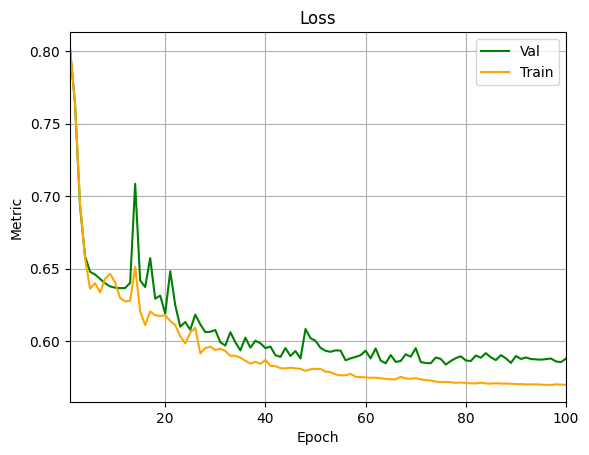

In [ ]:
epoch = [x for x in range(1, max_epochs + 1)]
plt.grid(True)
plt.ylabel("Metric")
plt.xlabel('Epoch')
plt.xlim(1, max_epochs)
plt.plot(epoch, epoch_loss_val, color = 'green', label = 'Val')
plt.plot(epoch, epoch_loss_train, color = 'orange', label = 'Train')
plt.title('Loss')
plt.legend()